In [1]:
from duckduckgo_search import ddg_images
from os import *
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [2]:
def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
searches = ["mcdonald's stores", "mcdonalds logo", 
            "burger king stores", "burger king logo", 
            "subway stores", "subway logo", 
            "white", "red", "yellow", "green"]
path = Path('temp_data/macs_or_not')

In [33]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))

Searching for 'subway stores'


In [34]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

In [ ]:
searches2 = ["mcdonald's outlets singapore", "burger king outlets singapore", "subway outlets singapore"]
path = Path('temp_data/test')

In [14]:
for o in searches2:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))

Searching for 'subway outlets singapore'


In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

In [36]:
os.rename("data/test/mcdonald's outlets singapore", "data/test/mcdonald's stores")
os.rename("data/test/burger king outlets singapore", "data/test/burger king stores")
os.rename("data/test/subway outlets singapore", "data/test/subway stores")

In [37]:
path = Path("data")
dls = ImageDataLoaders.from_folder(path, train = "macs_or_not", valid = "test", item_tfms=[Resize(192, method='squish')] )

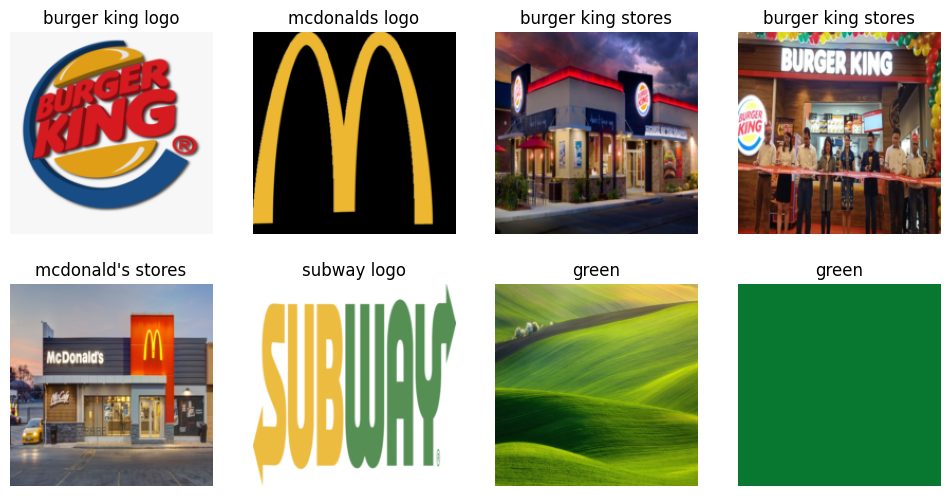

In [38]:
dls.show_batch(max_n=8, nrows=2)

In [ ]:
#macs = DataBlock(
#    blocks=(ImageBlock, CategoryBlock), 
#    get_items=get_image_files, 
#    splitter=RandomSplitter(valid_pct=0.2, seed=42),
#    get_y=parent_label,
#    item_tfms=[Resize(192, method='squish')]
#)
#macs = macs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
#dls = macs.dataloaders(path, bs=32)
#dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.545225,1.511103,0.539823,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.757730,1.559440,0.513274,00:06
1,0.563114,1.373290,0.451327,00:06
2,0.412658,1.400719,0.451327,00:06
3,0.307672,1.447938,0.451327,00:06
4,0.237425,1.383583,0.424779,00:06
5,0.179502,1.349070,0.433628,00:06
6,0.140819,1.514879,0.424779,00:06
7,0.110718,1.480608,0.415929,00:06
8,0.088179,1.527208,0.407080,00:06
9,0.073491,1.499037,0.424779,00:06


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9d78acf700>
Traceback (most recent call last):
  File "/home/zwq/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9d78acf700>    self._shutdown_workers()

Traceback (most recent call last):
  File "/home/zwq/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/home/zwq/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()if w.is_alive():

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/home/zwq/.local/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/lib/python3.8/mul

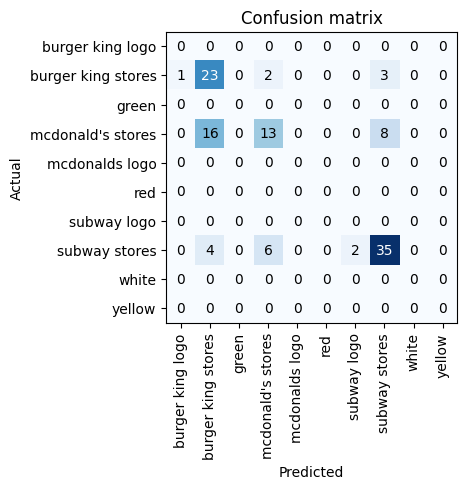

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [41]:
learn.dls.vocab

['burger king logo', 'burger king stores', 'green', "mcdonald's stores", 'mcdonalds logo', 'red', 'subway logo', 'subway stores', 'white', 'yellow']

In [42]:
prob, actual, predicted = learn.get_preds(dl=learn.dls.valid, with_decoded=True)
actual, predicted

(tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 TensorBase([1, 7, 7, 3, 1, 3, 1, 1, 3, 1, 1, 3, 7, 1, 1, 3, 3, 1, 7, 1, 3, 3, 1,
             7, 7, 7, 3, 1, 1, 3, 3, 1, 3, 1, 1, 7, 3, 7, 7, 7, 6, 7, 7, 3, 1, 7,
             1, 7, 7, 7, 7, 3, 7, 7, 7, 1, 7, 6, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7,
             3, 3, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 0, 1, 1, 1, 1, 1, 1,
             1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 7, 1, 1, 3, 1, 1, 1, 1]))

In [46]:
x1, z1, x2, y2, z2, count = 0, 0, 0, 0, 0, -1
for i in actual:
    if i == 3: x1 += 1
    elif i == 7: z1 += 1
    else: break
y1 = len(actual) - x1 - z1
for j in predicted:
    count+=1
    if(count < x1 and (j == 3 or j == 4)): x2 += 1
    elif(x1 <= count < x1 + z1 and (j == 6 or j == 7)): z2 += 1
    elif(count >= x1 + z1 and (j == 0 or j ==1)): y2 += 1
pct1 = (x2 / x1) * 100
pct2 = (y2 / y1) * 100
pct3 = (z2 / z1) * 100
print("McDonald's: %.3f%%" % pct1)
print("Burger King: %.3f%%" % pct2)
print("Subway: %.3f%%" % pct3)

McDonald's: 35.135%
Burger King: 82.759%
Subway: 78.723%


In [48]:
!pip3 install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
Traceback (most recent call last):
  File "/home/zwq/.local/bin/jupyter-serverextension", line 8, in <module>
    sys.exit(main())
  File "/home/zwq/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/home/zwq/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/home/zwq/.local/lib/python3.8/site-packages/notebook/serverextensions.py", line 289, in start
    super().start()
  File "/home/zwq/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 266, in start
    self.subapp.start()
  File "/home/zwq/.local/lib/python3.8/site-packages/notebook/serverextensions.py", line 210, in start
    self.toggle_server_extension(arg)
  File "/home/zwq/.local/lib/python3.8/site-packages/notebook/serverextensions.py", line 181, in toggle_server_extension
    to